In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('Covid Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Looking at df.info(), we can see that there are no null values, which is good. This means we do not have to worry about removing missing values in our data. Next, because we want to focus on whether the patient passed away or lived, let's take a look at the "DATE_DIED" column.

In [4]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


Here, we can see that if the patient survived, the value for "DATE_DIED" is "9999-99-99." Because the target for our regression is whether the patient lived or not and we do not care about when they passed, we will simply change the "DATE_DIED" value to either 0 for lived and 1 for expired. We will also drop duplicate data if any.

In [5]:
df.drop_duplicates(inplace = True)
df['DATE_DIED'] = df['DATE_DIED'].replace({'9999-99-99': '0'})
df[df['DATE_DIED'] != '0'] = 1 
df["DATE_DIED"] = pd.to_numeric(df["DATE_DIED"])

In [6]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,0,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,0,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,0,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,0,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


Printing out df, we can see that our updates to the "DATE_DIED" column was successful. Next, let's take a look at a heatmap of our data to see if there are any correlation between our columns.

# HEATMAP VISUALIZATION

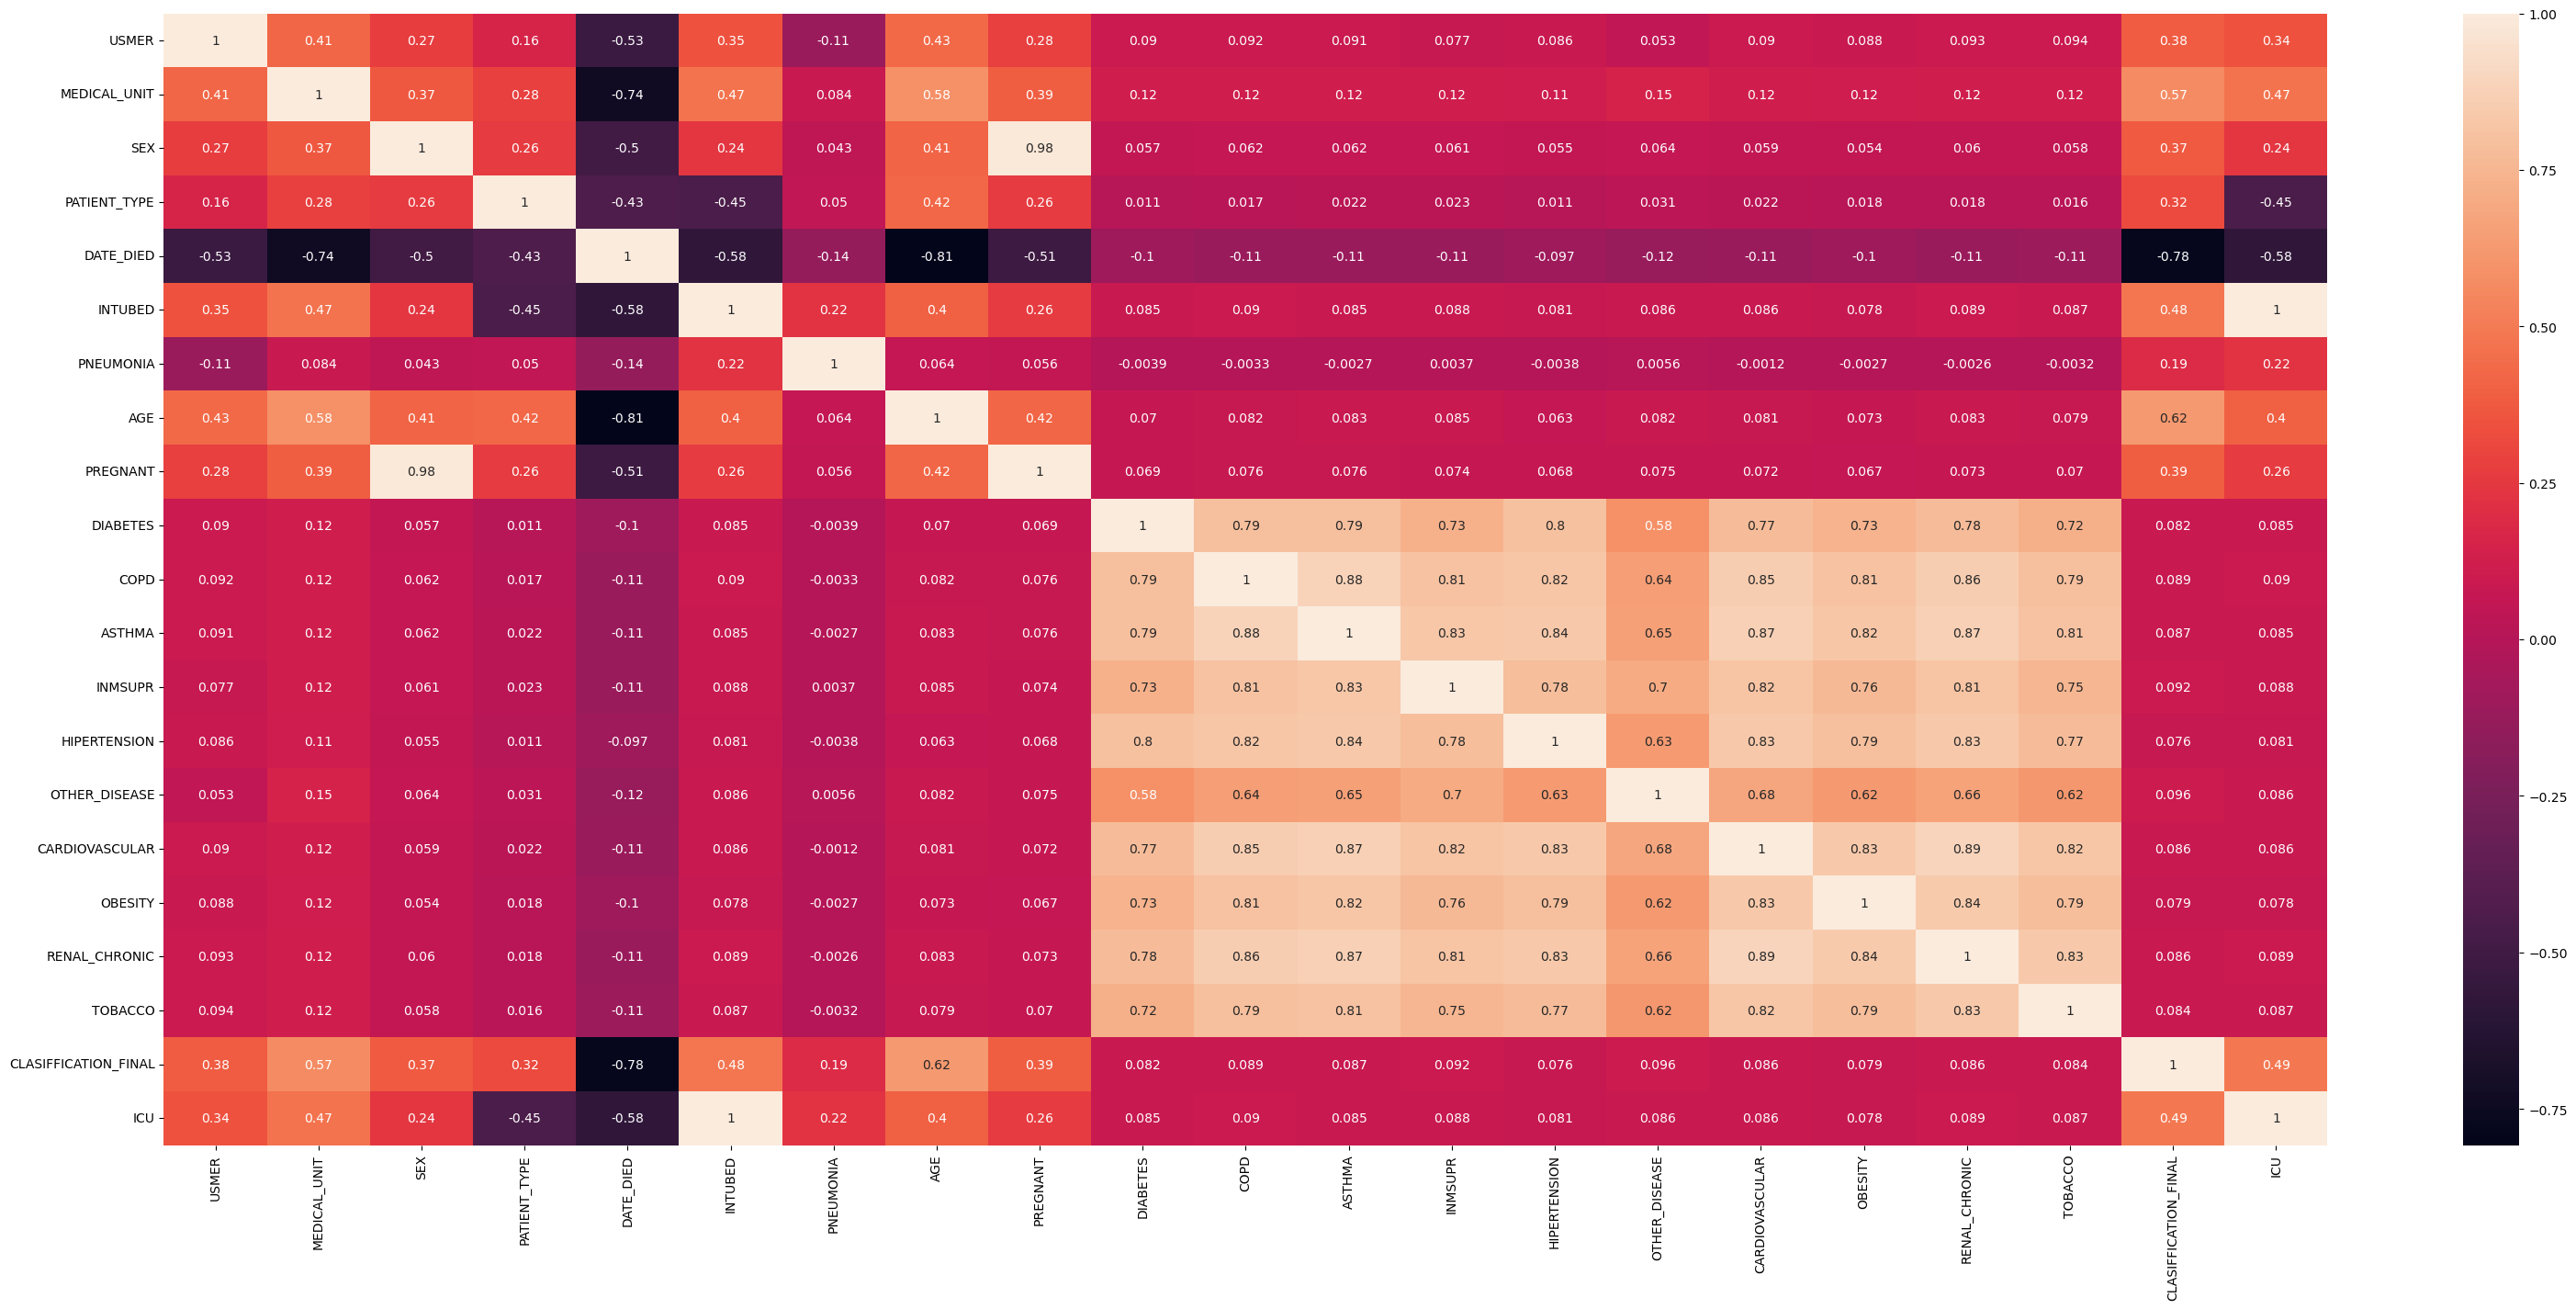

In [7]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

The heatmap shows some very interesting correlations. Looking at the "DATE_DIED" column, patients passing away had the most correlation with age, and the second highest was pregnancy. Having other pre-existing medical conditions, such as diabetes, COPD, Asthma, etc. appears to not have too much correlation with the amount of deaths from COVID.

Next, let us go ahead and build our model and start our training.

# MODEL AND TRAINING

In [8]:
y = df.DATE_DIED
X = df.iloc[:, df.columns != 'DATE_DIED']

In [9]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1048568    0
1048569    0
1048571    0
1048572    0
1048574    0
Name: DATE_DIED, Length: 236526, dtype: int64

In [10]:
X

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,97,2,47,97,1,2,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,2,2,56,2,1,2,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 100.00%
The accuracy for the test set is 100.00%


Our training sets and test sets ended up having a really high accuracy! Doesn't seem like we will be needing to remove any of the columns. Next, let's take a look at the probabilities of our classifier.

# PROBABILITIES

In [12]:
probs = model.predict_proba(X_test_scaled)
np.set_printoptions(precision=4, suppress=True)
probs[:5]

array([[1.    , 0.    ],
       [1.    , 0.    ],
       [0.0001, 0.9999],
       [1.    , 0.    ],
       [0.0001, 0.9999]])